Name: David Crow
====

CSCE 823 Assignment 1 
---

Starter Code

Simple perceptron learning for NOT, OR, AND, and paper example (NUT).  Also trained on XOR which is
mainly a teaching tool to show how non-linearly separable points cannot be trained to with one layer.

Student will need to **analyze results and discuss** NOT, OR, AND and  NUT performance


Student will need to analyze results and discuss performance of single layer perceptron XOR

Student will need to build new multi layer perceptron for XOR, train, evaluate, and discuss performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import callbacks

import keras

Using TensorFlow backend.


In [2]:
print("Tensor_Flow version:")
print(tf.__version__)

print("Keras version:")
print(keras.__version__)

Tensor_Flow version:
1.13.1
Keras version:
2.2.4


# Step 0: Tools & Helper Functions

In [3]:
def makeDecisionBoundaryBool2(model,featureData,labelData,title):
    '''Build decision boundary figure for 2-input, 1-output boolean logic functions
    Note that this assumes a hard sigmoid was used and establishes a cutoff at 0.5
    for predicting 0 or 1'''  
    cutoff = 0.5   #0.5 for Sigmoid. 0.0 for TANH
    fig, ax = plt.subplots(figsize=(5,5))

    xmin,xmax = np.min(featureData[:,0])-0.1, np.max(featureData[:,0])+0.1
    ymin,ymax = np.min(featureData[:,1])-0.1, np.max(featureData[:,1])+0.1
    
    #Create filled countour map to color both sides of the boundary
    x = np.linspace(xmin,xmax,200)
    y = np.linspace(ymin,ymax,200)
    X, Y = np.meshgrid(x, y)
    grid = np.c_[X.ravel(),Y.ravel()]
    preds = model.predict(grid)  #get predictions
    z = preds.reshape(X.shape)>cutoff   # cutoff on predictions to return boolean output
    plt.contourf(X,Y,z,cmap='YlOrBr')
    
    #add annotated points to show where the boolean inputs lie on the graph
    ax.scatter(featureData[:,0],featureData[:,1], color='b', alpha = 0.5)
    for i, txt in enumerate(labelData):
        ax.annotate(np.asscalar(txt), (featureData[i,0],featureData[i,1])) 
    
    #adjust the axis & add labels for the graph
    plt.axis([xmin, xmax, ymin, ymax])
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.title(title)  

def graphHistory(history, title):
    '''Function for graphing the training and validation accuracy and loss'''
    # summarize history for accuracy
    fig = plt.figure()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy ' + title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Tr. Acc', 'Val. Acc'])
    plt.show()

    # summarize history for loss
    fig = plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss ' + title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Tr. Loss', 'Val. Loss'])
    plt.show()
    

# Step 1: Generic Keras model for perceptron (must be parameterized on call)

In [4]:
def perceptron(width, learningRate):
    '''Builds and returns a perceptron model of arbitrary input width & learning rate'''
    model = Sequential()  #define the building mode - sequential
    # declare the hidden layer with 1 node, hard sigmoid
    # set bias vector to all 1s
    model.add(Dense(units=1, activation='hard_sigmoid', 
                    use_bias=True, bias_initializer='ones', 
                    input_shape=(width,)))
    # declare the adam optimizer
    adam = optimizers.Adam(lr=learningRate)
    # compile the model with loss = binary_crossentropy
    model.compile(optimizer=adam,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Step 2:  Boolean Datasets

In [5]:
# Inputs to the perceptrons
xONE = np.array([[1],[0]])
xTWO = np.array([[0,0],[0,1],[1,0],[1,1]])
    
# y matrices for boolean output
yNOT = np.matrix('0;1')
yAND = np.matrix('0;0;0;1')
yOR = np.matrix('0;1;1;1')
yXOR = np.matrix('0;1;1;0')

# Step 3:  Instantiate Fyfe's Nut Dataset

In [6]:
# Defining NUT database arrays
xNUT = np.array([[2.2,1.4],[1.5,1.0],[0.6,0.5],[2.3,2.0],[1.3,1.5],[0.3,1.0]])
yNUT = np.array([[0],[0],[0],[1],[1],[1]])

# Step 4:  Modeling the Boolean NOT Dataset

## Step 4a:  Fit model on NOT dataset

In [7]:
# Learning 'NOT'

pmNOT = perceptron(width=1,learningRate=0.1)
training_verbosity = 0 #set to 1 or 2 for more detailed training output, 0 for none

history = pmNOT.fit(x=xONE, y=yNOT, batch_size=1, epochs=100, verbose=training_verbosity,
    callbacks=None, validation_split=0.1, validation_data=(xONE,yNOT), shuffle=True,
    class_weight=None,sample_weight=None, initial_epoch=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Step 4b:  Report Training and Validation Performance Results

[1.0960467022869125e-07, 1.0]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


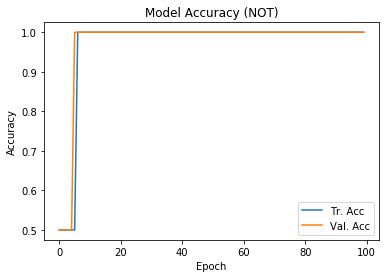

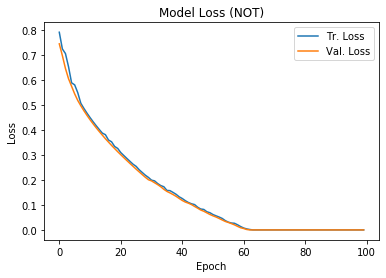

In [8]:
lossValMetrics = pmNOT.evaluate(xONE, yNOT, batch_size=2, verbose=2, sample_weight=None)
print(lossValMetrics)
#plot history
print(history.history.keys())
graphHistory(history, '(NOT)')

#### Model performance discussion: default values

For the default values of $learning\_rate=0.1$ and $max\_epochs=100$, the first $n$ epochs achieve $accuracy=0.5$ for both the training set and the validation set, and all further epochs achieve $accuracy=1$. Every once in a while, $n\geq10$ (I have seen as high as $n=58$), but it's usually the case that $n=0$ or $n\approx5$.

The loss graph shows that the training loss and validation loss are nearly identical for all epochs. At most, the two loss values differ by $0.75$, but this really only occurs in the first few epochs (if at all), and the difference is usually less than $0.25$. For all models, the two loss lines decrease as epochs increase, and they eventually bottom out at $loss=0$. Sometimes they bottom out as early as $10$ iterations, but they usually don't reach $loss=0$ until after $60$ iterations. At worst, the model reaches $loss=0$ at the $100^{th}$ iteration (or slighly after).

---

#### Model performance discussion: modified values

By modifying $learning\_rate$ and $max\_epochs$, we can achieve varying performance levels. Learning rates arbitrarily close to $0$ (e.g., $0.01$, $0.001$) are simply unable to achieve $loss=0$ - even if $accuracy=1$ - because they do not learn quickly enough for $100$ epochs. However, by increasing the number of epochs to larger numbers (e.g., $1000$, $10000$), we see graphs much like those generated by the default values.

We can decrease the required number of epochs by increasing the learning rate. For example, $learning\_rate=0.7$ tends to achieve $loss=0$ after just $5$ or $10$ epochs, but the loss values *before* the graph reaches $loss=0$ tend to vary greatly. It's likely that such a high learning rate does not work well for more complex datasets.

# Step 5: Modeling the  OR Dataset

## Step 5a:  Fit Model on OR

In [9]:
# Learning OR
pmOR = perceptron(width=2,learningRate=0.01)
training_verbosity = 0 #set to 1 or 2 for more detaied training output, 0 for none
history = pmOR.fit(x=xTWO, y=yOR, batch_size=1, epochs=1000, verbose=training_verbosity, callbacks=None, 
    validation_split=0.1, validation_data=(xTWO,yOR), shuffle=True, class_weight=None, 
    sample_weight=None, initial_epoch=0)

## Step 5b:  Evaluate training performance on OR

[1.1440700120601832e-07, 1.0]
[array([[5.016003 ],
       [5.0263963]], dtype=float32), array([-2.513469], dtype=float32)]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


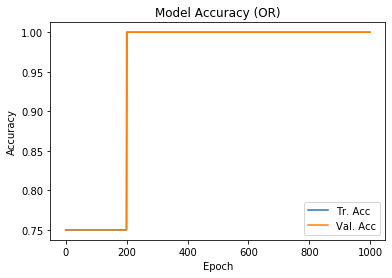

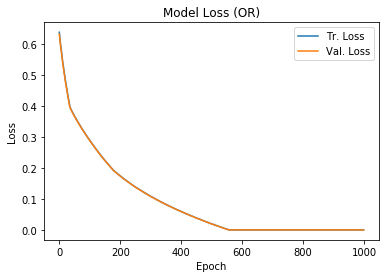

In [10]:
lossValMetrics = pmOR.evaluate(xTWO, yOR, batch_size=4, verbose=2, sample_weight=None)
print(lossValMetrics)
weights = pmOR.get_weights()
print(weights)
#plot history
print(history.history.keys())    
graphHistory(history, '(OR)')

#### Model performance discussion: default values

For the default values of $learning\_rate=0.1$ and $max\_epochs=100$, we see that the model typically achieves $accuracy=0.75$ for the first $10$ or so iterations and an accuracy of $1$ for all further iterations. Sometimes, though, $accuracy=0.5$ for a few iterations before increasing to $0.75$ and later to $1$. The training set and validation set accuracies are essentially identical over all epochs.

Like for the NOT dataset, the loss values bottom out at $loss=0$ after about $50$ iterations. The training set and validation set loss values are extremely similar over nearly all iterations, but sometimes the first few iterations differ in loss by about $0.1$.

---

#### Model performance discussion: modified values

By modifying $learning\_rate$ and $max\_epochs$, we can again vary the performance achieved. For example, by keeping $learning\_rate=0.1$ and setting $max\_epochs$ to be significantly less than $50$ (i.e., $40$ or less), we see that, although the accuracy eventually reaches $1$, the loss can fail to reach $0$. By increasing the learning rate, however, we can achieve perfect accuracy with a small number of epochs; $learning\_rate=0.5$ and $max\_epochs=10$ is an example of one such combination.

Like the NOT dataset, very small values for the learning rate (e.g., $0.01$) require relatively large numbers of epochs (e.g., $1000$) to achieve good results. Of course, this is entirely expected.

## Step 5c:  Display the Decision Boundary on OR

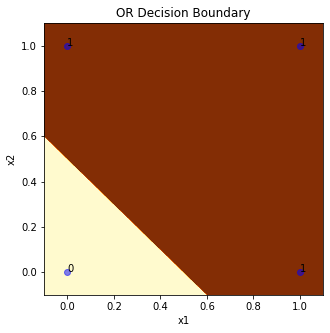

In [11]:
makeDecisionBoundaryBool2(pmOR,xTWO,yOR,'OR Decision Boundary')

The two classes are linearly-separable, so it's not surprising that our single-layer model can correctly model OR.

The decision boundary appears to *safely* separate the Class 0 point from the Class 1 points. Here, "safely" means that variations (i.e., noise) in the locations of the points are not likely to change the accuracy of the border. In other words, all points are well within their respective zones.

Additionally, we see that the boundary *evenly* separates the classes along $x_1$ and $x_2$. The model weights give a slope of about $-1$, and so the $x_1$ distance between the boundary and Point 0 is the same as the $x_2$ distance between the boundary and Point 0.

# Step 6:  Modeling the AND Dataset

## Step 6a:  Fit model to AND Dataset

In [12]:
pmAND = perceptron(width=2,learningRate=0.01)
training_verbosity = 0 #set to 1 or 2 for more detaied training output, 0 for none
history = pmAND.fit(x=xTWO, y=yAND, batch_size=1, epochs=500, verbose=training_verbosity, callbacks=None, 
    validation_split=0.1, validation_data=(xTWO,yAND), shuffle=True, class_weight=None, 
    sample_weight=None, initial_epoch=0)

## Step 6b:  Evaluate Training Performance on AND Dataset

[0.23006705939769745, 1.0]
[array([[2.095346],
       [2.075791]], dtype=float32), array([-3.6369014], dtype=float32)]


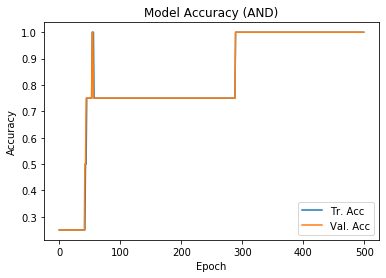

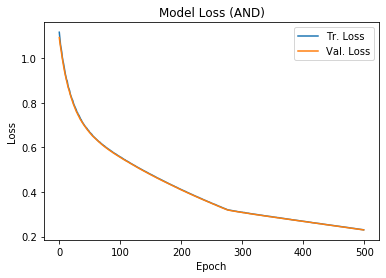

In [13]:
lossValMetrics = pmAND.evaluate(xTWO, yAND, batch_size=4, verbose=2, sample_weight=None)
print(lossValMetrics)
weights = pmAND.get_weights()
print(weights)
graphHistory(history, '(AND)')

## Step 6c:  Display Decision Boundary of AND Dataset

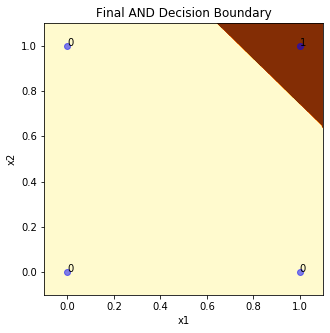

In [14]:
makeDecisionBoundaryBool2(pmAND,xTWO,yAND,'Final AND Decision Boundary')

Again, the classes are linearly-separable, so our single-layer model can effectively model the AND dataset.

As expected, the AND boundary is effectively the same as the OR boundary (but rotated $180$ degrees). In other words, the Class 1 point is well within the Class 1 side of the boundary, and the same is true for Class 0. Additionally, the $x_1$ separation is the same as the $x_2$ separation.

One significant difference is that the Class 1 AND area is much smaller than the Class 0 OR area. Both boundaries correctly separate the classes, but the OR boundary evenly splits the empty space (that is, the space without points) between Class 0 and Class 1; the AND boundary, on the other hand, tends to give much more of the empty space to Class 0. I assume we can attribute this to the random nature of the model, but perhaps there is some underlying principle I'm not aware of. 

# Step 7:  Modeling Fyfe's NUT dataset

## Step 7a:  Fit a perceptron model to the NUT dataset

In [15]:
# Final learning scenario -- NUT
#batchSize, width, learningRate
pmNUT = perceptron(width=2,learningRate=0.1)
training_verbosity = 0 #set to 1 or 2 for more detaied training output, 0 for none
history = pmNUT.fit(x=xNUT, y=yNUT, batch_size=1, epochs=100, verbose=training_verbosity, callbacks=None, 
    validation_split=0.1, validation_data=(xNUT,yNUT), shuffle=True, class_weight=None, 
    sample_weight=None, initial_epoch=0)

## Step 7b:  Evaluate model performance on the NUT dataset

[0.33071961998939514, 1.0]
[array([[-2.0307674],
       [ 3.6361334]], dtype=float32), array([-1.4255157], dtype=float32)]


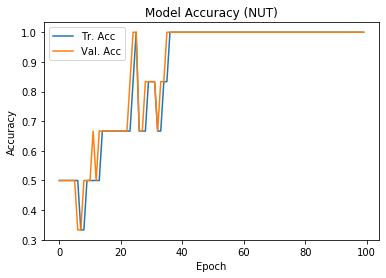

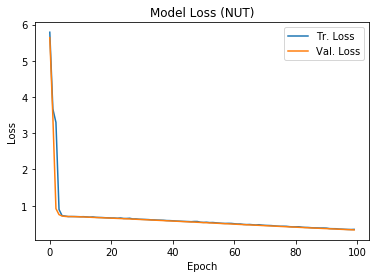

In [16]:
lossValMetrics = pmNUT.evaluate(xNUT, yNUT, batch_size=6, verbose=2, sample_weight=None)
print(lossValMetrics)
print(pmNUT.get_weights())
graphHistory(history, '(NUT)')

## Step 7c:  Plot decision boundary on NUT dataset

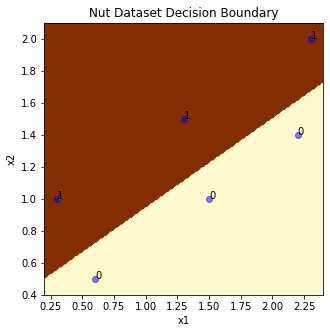

In [17]:
makeDecisionBoundaryBool2(pmNUT,xNUT,yNUT,'Nut Dataset Decision Boundary')

Like for the OR and AND datasets, the classes here are linearly-separable. For this reason, our model correctly identifies the different classes in the NUT dataset. We see this in the above graph.

Here, the boundary cleanly separates Class 0 from Class 1. The boundary is (effectively) parallel to the lines that the two sets of nuts lie along, and the boundary is halfway between the two lines. Clearly, the boundary is not likely to misidentify any of the nuts if at least one nut's position is slightly varied (due to noise in the system, for example).

# Step 8: Modeling XOR logic with a single perceptron

## Step 8a:  Fit a single perceptron to the XOR data

In [18]:
# This will not perform well due to the fact that the classes are not linearly seperable
print("Starting XOR training")
#batchSize, width, learningRate
pm_single_layerXOR = perceptron(width=2,learningRate=.1)
training_verbosity = 0 #set to 1 or 2 for more detaied training output, 0 for none
history = pm_single_layerXOR.fit(x=xTWO, y=yXOR, batch_size=1, epochs=200, verbose=training_verbosity, callbacks=None, 
    validation_split=0.1, validation_data=(xTWO,yXOR), shuffle=True, class_weight=None, 
    sample_weight=None, initial_epoch=0)
print("Completed XOR training")

Starting XOR training
Completed XOR training


## Step 8b:  Evaluate single perceptron model performance on the XOR data

[0.6932061314582825, 0.5]
[array([[-0.04505867],
       [-0.01338143]], dtype=float32), array([0.01552151], dtype=float32)]


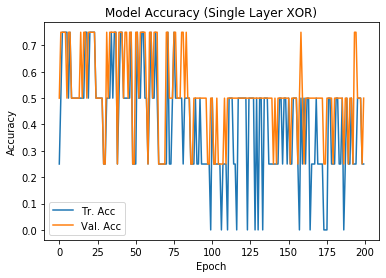

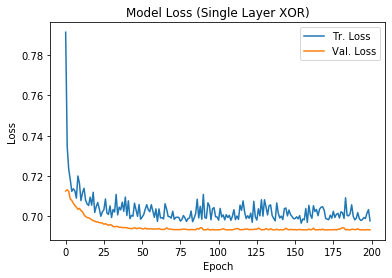

In [19]:
lossValMetrics = pm_single_layerXOR.evaluate(xTWO, yXOR, batch_size=4, verbose=2, sample_weight=None)
print(lossValMetrics)
print(pm_single_layerXOR.get_weights())
graphHistory(history, '(Single Layer XOR)')

## Step 8c:  Decision Boundary for XOR using single perceptron

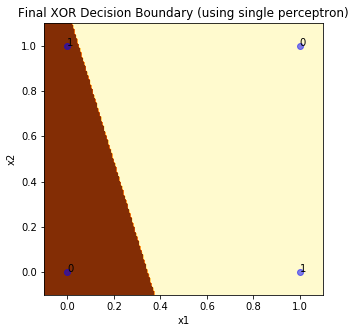

In [20]:
makeDecisionBoundaryBool2(pm_single_layerXOR,xTWO,yXOR,'Final XOR Decision Boundary (using single perceptron)')

# Step 9:  Modeling XOR with a Multilayer Perceptron

## Step 9a:  Define your multilayer models in Keras

Building this model was fairly straightforward. Because of our in-class discussion (and because of the Homework 1 assignment document), I knew that a two input/one output model with one hidden layer of two nodes could effectively fit XOR. For this reason, I developed this model with that shape in mind. That shape guided most of my parameter decisions.

With the default learning rate of $0.1$, using $epochs=1000$ all but guarantees that the model correctly fits XOR. However, by increasing the learning rate, we can decrease the required number of epochs (and thus reduce the training time). As an example, we can halve the maximum number of epochs (to $500$) by using $learning\_rate=0.25$.

Alternatively, we can use a lower learning rate (like the default $0.1$) and an early stopping callback to terminate our training. Because we know exactly what we're fitting, we know that the model can always reach $loss=0$ after some amount of time. If we set our maximum number of epochs to some high number like $4000$ and stop early if $loss=0$, then we can all but guarantee that the model correctly fits XOR.

I used a hard sigmoid activation for the output layer because the assignment document says to do so. I used a hard sigmoid activation for the hidden layer because it seemed to work better (that is, more consistently) than either sigmoid or relu.

In [21]:
# some parameters
hidden_layer_size = 2
learning_rate = 0.1

# instantiate the model
pm_multi_layerXOR = Sequential()
pm_multi_layerXOR.add(Dense(
    units=hidden_layer_size, input_dim=2, activation='hard_sigmoid', use_bias=True, bias_initializer='ones'))
pm_multi_layerXOR.add(Dense(
    units=1, input_dim=hidden_layer_size, activation='hard_sigmoid', use_bias=True, bias_initializer='ones'))

# compile the model with loss = binary_crossentropy
pm_multi_layerXOR.compile(optimizer=optimizers.Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

## Step 9b:  Fit the models on the XOR dataset

In [22]:
"""
Generally, one would hope to terminate early by using some delta, for which Keras's built-in early stopping callbacks suffice.
Howver, we know that the loss here can actually reach 0 (or close enough), so we should stop on a value.
Keras has some issues with early stopping callbacks when one wants to stop on a specific value.
For this reason, we can define a custom callback here that works how we expect.

See the following references:

https://keras.io/callbacks/
https://stackoverflow.com/questions/53500047/stop-training-in-keras-when-accuracy-is-already-1-0
https://stackoverflow.com/questions/37293642/how-to-tell-keras-stop-training-based-on-loss-value
"""

# define a custom callback
class EarlyStopping(callbacks.Callback):
    def __init__(self, monitor='val_loss', value=0.00001, verbose=1):
        super(callbacks.Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)

            self.model.stop_training = True

In [23]:
# capture the model history
history = pm_multi_layerXOR.fit(x=xTWO, y=yXOR, batch_size=1, epochs=4000, verbose=0, callbacks=[EarlyStopping()], 
    validation_split=0.1, validation_data=(xTWO,yXOR), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)

Epoch 00701: early stopping


## Step 9c:  Report the performances of the multilayer models on XOR

[1.0960467022869125e-07, 1.0]


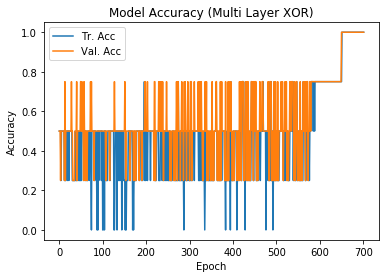

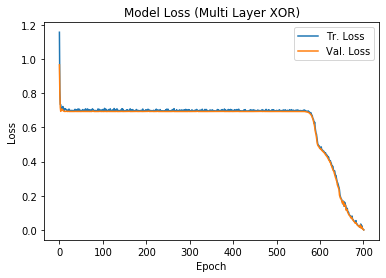

In [24]:
lossValMetrics = pm_multi_layerXOR.evaluate(xTWO, yXOR, batch_size=4, verbose=0, sample_weight=None)
print(lossValMetrics)

graphHistory(history, '(Multi Layer XOR)')

As expected, the model performs poorly at first (as it learns). However, after a few hundred epochs, the model usually achieves $accuracy=1$ and $loss=0$. It's clear, then, that the two-layer model can correctly fit the XOR dataset - at least with the selected hyperparameters.

Of course, the number of epochs required to reach the optimal values might be high, but letting $epochs=4000$ and using the callback function defined above should avoid model failure.

## Step 9d:  Plot the decision boundary for the best multilayer perceptron on XOR

[array([[-4.9099593, -6.1071835],
       [-4.9620786, -6.895619 ]], dtype=float32), array([7.148716, 2.508891], dtype=float32), array([[ 5.968662 ],
       [-6.5958505]], dtype=float32), array([-2.509335], dtype=float32)]


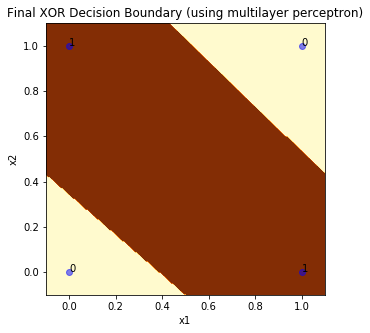

In [25]:
print(pm_multi_layerXOR.get_weights())
makeDecisionBoundaryBool2(pm_multi_layerXOR, xTWO, yXOR, 'Final XOR Decision Boundary (using multilayer perceptron)')

It's difficult to understand exactly how the weights affect the boundary - even for such a small network, the number of weights is nontrivial, and thus their interrelationships are hard to determine.

However, we can certainly see that the multilayer network correctly fits the XOR dataset. The Class 1 points are safely contained within the Class 1 decision area, and the same is true for Class 0. In othetr words, variability/noise in our input data is not likely to change our model's accuracy because the boundaries are not exceptionally close to any of the points.